# YouTube Spam Comments Detection

In [0]:
#import necessary libraries
import pandas as pd
import re
from sklearn.model_selection import train_test_split

## About Data
As an example for text classification we work with 1956 comments from 5 different YouTube videos. The comments were collected via the YouTube API from five of the ten most viewed videos on YouTube in the first half of 2015. The comments were manually labeled as spam or legitimate. Spam was coded with a “1” and legitimate comments with a “0”. Data files: 'Youtube01-Psy.csv','Youtube02-KatyPerry.csv','Youtube03-LMFAO.csv','Youtube04-Eminem.csv','Youtube05-Shakira.csv'

In [0]:
#Read in the data
train_data = []
data_files = ['Youtube01-Psy.csv','Youtube02-KatyPerry.csv','Youtube03-LMFAO.csv','Youtube04-Eminem.csv','Youtube05-Shakira.csv']
for file in data_files:
    data = pd.read_csv(file)
    train_data.append(data)
train_data = pd.concat(train_data)
train_data.head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",1
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,1
2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com,1
3,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1
4,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,1


In [0]:
#check the count of each class
train_data['CLASS'].value_counts()

1    1005
0     951
Name: CLASS, dtype: int64

## Cleaning the data
1. Drop insignificant columns
2. Process the contents of data
3. Extract features from the data


In [0]:
#drop columns
def drop_features(features,data):
    data.drop(features,axis=1,inplace=True)

In [0]:
drop_features(['COMMENT_ID','AUTHOR','DATE'],train_data)
train_data.info()
train_data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1956 entries, 0 to 369
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   CONTENT  1956 non-null   object
 1   CLASS    1956 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 45.8+ KB


,CONTENT,CLASS
0,"Huh, anyway check out this you[tube] channel: ...",1
1,Hey guys check out my new channel and our firs...,1
2,just for test I have to say murdev.com,1
3,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1
4,watch?v=vtaRGgvGtWQ Check this out .﻿,1


In [0]:
#process content
def process_content(content):
    return " ".join(re.findall("[A-Za-z]+",content.lower()))

In [0]:
train_data['processed_content'] = train_data['CONTENT'].apply(process_content)
train_data.head()

,CONTENT,CLASS,processed_content
0,"Huh, anyway check out this you[tube] channel: ...",1,huh anyway check out this you tube channel kob...
1,Hey guys check out my new channel and our firs...,1,hey guys check out my new channel and our firs...
2,just for test I have to say murdev.com,1,just for test i have to say murdev com
3,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1,me shaking my sexy ass on my channel enjoy
4,watch?v=vtaRGgvGtWQ Check this out .﻿,1,watch v vtarggvgtwq check this out


In [0]:
#drop 'CONTENT', lets use 'PROCESSED CONTENT'
drop_features(['CONTENT'],train_data)

In [0]:
#Train test split
x_train, x_test, y_train, y_test = train_test_split(train_data['processed_content'],train_data['CLASS'],test_size=0.2,random_state=57)

In [0]:
print(x_train)

276    cool video lmfaovevo you should check out my s...
261                                  subscribe my chanel
244    i know that maybe no one will read this but pl...
318                   check out this playlist on youtube
380    hey its m e s here i m a young up and coming r...
                             ...                        
403    subscribe to me if u think quot swag quot is f...
56     i love this song it s for empowering every wom...
329          check out this playlist on youtube hbbhhhgh
164    could spanish people understand this br br any...
275     like this comment if you are watching on a phone
Name: processed_content, Length: 1564, dtype: object


In [0]:
#Feature extraction
#Count Vectorizer
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer(stop_words='english')
x_train_counts = count_vect.fit_transform(x_train)

In [0]:
print(count_vect.vocabulary_)
print(x_train_counts)

In [0]:
#Term frequency - inverse document frequency
from sklearn.feature_extraction.text import TfidfTransformer
tranformer = TfidfTransformer()
x_train_tfidf = tranformer.fit_transform(x_train_counts)

In [0]:
print(x_train_tfidf)

  (0, 3108)	0.15012737481999194
  (0, 3107)	0.09954971942502733
  (0, 2618)	0.2266210988147399
  (0, 2416)	0.221298974133836
  (0, 2229)	0.1949857305863566
  (0, 2105)	0.221298974133836
  (0, 2026)	0.221298974133836
  (0, 1726)	0.264551204493268
  (0, 1376)	0.14331344758515127
  (0, 1372)	0.17222496536498563
  (0, 1285)	0.221298974133836
  (0, 1202)	0.18176274304837522
  (0, 918)	0.529102408986536
  (0, 579)	0.18176274304837522
  (0, 525)	0.11157517176922857
  (0, 498)	0.20898460403619162
  (0, 467)	0.250552331043433
  (0, 463)	0.08366888312187151
  (0, 451)	0.11642107551984254
  (0, 446)	0.17222496536498563
  (0, 155)	0.21668874003588184
  (1, 2802)	0.4169027916259167
  (1, 447)	0.9089510780754471
  (2, 3320)	0.08121655125127974
  (2, 3028)	0.14476805678751523
  :	:
  (1559, 1108)	0.36503154042412095
  (1560, 3234)	0.4574005489887746
  (1560, 2695)	0.20333946164509845
  (1560, 2480)	0.3705517204574569
  (1560, 1756)	0.22724886827505128
  (1560, 1303)	0.3569460101522803
  (1560, 1197)	

In [0]:
x_test_counts = count_vect.transform(x_test)
x_test_tfidf = tranformer.transform(x_test_counts)

## ML Modeling
We have completed cleaning of our data and we have training samples to train the model and testing samples to verify the accuracy of our models. 

## Logistic Regression
Logistic regression is a simple statistical model which predicts a binary response (ex. 0/1). For this data, we are predicting whether a comment is a spam or not.

In [0]:
#Create and train Logistic Regression model
from sklearn.linear_model import LogisticRegression
model_reg = LogisticRegression()
model_reg.fit(x_train_tfidf,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
#Run it on test data and calculate the accuracy
accuracy = model_reg.score(x_test_tfidf, y_test)
print(accuracy)

0.9260204081632653


## Random Forest Classifier
Random Forest is a supervised learning algorithm. Like you can already see from it’s name, it creates a forest and makes it somehow random. The forest it builds, is an ensemble of Decision Trees. To say it in simple words: Random forest builds multiple decision trees and merges them together to get a more accurate and stable prediction.

In [0]:
#Create and train Random Forest Classifier model
from sklearn.ensemble import RandomForestClassifier
model_rfc = RandomForestClassifier()
model_rfc.fit(x_train_tfidf,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
#Run it on test data and calculate the accuracy
accuracy = model_rfc.score(x_test_tfidf, y_test)
print(accuracy)

0.9413265306122449


## Support Vector Machine
The objective of the support vector machine algorithm is to find a hyperplane in an N-dimensional space(N — the number of features) that distinctly classifies the data points.

In [0]:
#Create and train Support Vector Machine model
from sklearn import svm
model_svm = svm.SVC(C=100, gamma = 1)
model_svm.fit(x_train_tfidf, y_train)

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [0]:
#Run it on test data and calculate the accuracy
accuracy = model_svm.score(x_test_tfidf, y_test)
print(accuracy)

0.9336734693877551





## Validation curve for SVM

Author: Harish Kugur Sreekanta Babu

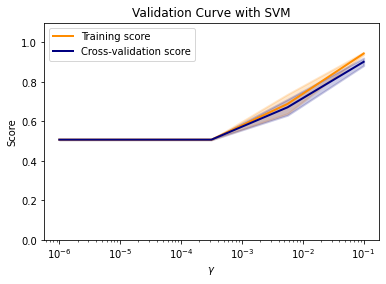

In [0]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve


param_range = np.logspace(-6, -1, 5)
train_scores, test_scores = validation_curve(
    SVC(), x_train_tfidf, y_train, param_name="gamma", param_range=param_range,
    scoring="accuracy", n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with SVM")
plt.xlabel(r"$\gamma$")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()




## Artificial Neural Network

Author: Harish Kugur Sreekanta Babu
 
  Artificial Neural Network consists of input, output and hidden layers. Here, Multi-Layer Perceptron model is used for classifying the data points. It uses back propagation for training the model

In [0]:
from sklearn.neural_network import MLPClassifier
model_nn2 = MLPClassifier(hidden_layer_sizes=(20,20,20,20), activation='relu', solver='adam', max_iter=5000)
model_nn2.fit(x_train_tfidf, y_train)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(20, 20, 20, 20), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=5000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [0]:
accuracy = model_nn2.score(x_test_tfidf, y_test)
print(accuracy)

0.923469387755102
  (0, 22)	0.4043955998849483
  (0, 525)	0.18008416976995412
  (0, 1375)	0.21739834437285652
  (0, 1469)	0.7315403917426447
  (0, 1720)	0.30773551318777204
  (0, 2802)	0.3562574344880065


## Support Vector Machine
Author: Harish Kugur Sreekanta Babu

 Another model of SVM is built using different parameters value

In [0]:
from sklearn import svm
model_svm_new = svm.SVC(C=100, gamma = 0.5)
model_svm_new.fit(x_train_tfidf, y_train)
accuracy = model_svm_new.score(x_test_tfidf, y_test)
print(accuracy)

0.9413265306122449
